In [1]:
from torchmetrics.image.fid import FrechetInceptionDistance



In [2]:
import os
from PIL import Image
import numpy as np

root_path = "/opt/diffusion/data_dumps/samples/original-data/cifar10/"
imgs = os.listdir(root_path)
imgs_real = [os.path.join(root_path, img) for img in imgs]

img = imgs_real[0]
img_np = np.array(Image.open(img))
np.min(img_np), np.max(img_np)

(7, 240)

In [3]:
import os
from PIL import Image
import numpy as np

root_path = "/opt/diffusion/data_dumps/samples/WrappedUNetModel-bs128-abs128-llr-4.8-emaTrue-2024-02-17-22-57-05-last-model/3"
imgs = os.listdir(root_path)
imgs = [os.path.join(root_path, img) for img in imgs]
# remmove all folders
imgs_fake = [img for img in imgs if not os.path.isdir(img)]

img = imgs_fake[0]
img_np = np.array(Image.open(img))
np.min(img_np), np.max(img_np)

(0, 255)

In [4]:
len(imgs_real)

44992

In [5]:
import torch
from tqdm import tqdm

fid = FrechetInceptionDistance(normalize=True).to("cuda")

n_imgs_total = []
fid_scores = []

batch_size = 256
n_batches = len(imgs_real) // batch_size

for batch_index in tqdm(range(n_batches), total=n_batches):


	imgs_real_subset = imgs_real[batch_index * batch_size: (batch_index+1) * batch_size]
	imgs_fake_subset = imgs_fake[batch_index * batch_size: (batch_index+1) * batch_size]

	if len(imgs_real_subset) == 0:
		break

	imgs_real_subset = torch.stack([torch.tensor(np.array(Image.open(img))) for img in imgs_real_subset]).to("cuda")
	imgs_fake_subset = torch.stack([torch.tensor(np.array(Image.open(img))) for img in imgs_fake_subset]).to("cuda")

	img_real_subset = imgs_real_subset.permute(0, 3, 1, 2)
	img_fake_subset = imgs_fake_subset.permute(0, 3, 1, 2)


	fid.update(img_real_subset, real=True)
	fid.update(img_fake_subset, real=False)
 
	fid_score = float(fid.compute())

	n_imgs_total.append((batch_index+1) * batch_size)
	fid_scores.append(fid_score)



	print(f"n_imgs: {n_imgs_total[-1]}, fid_score: {fid_score}")

  1%|          | 1/175 [00:01<05:32,  1.91s/it]

n_imgs: 256, fid_score: 129.31419372558594


  1%|          | 2/175 [00:03<05:12,  1.81s/it]

n_imgs: 512, fid_score: 92.10546112060547


  2%|▏         | 3/175 [00:05<04:54,  1.71s/it]

n_imgs: 768, fid_score: 73.45254516601562


  2%|▏         | 4/175 [00:07<05:24,  1.90s/it]

n_imgs: 1024, fid_score: 61.91048812866211


  3%|▎         | 5/175 [00:10<06:34,  2.32s/it]

n_imgs: 1280, fid_score: 54.44074630737305


  3%|▎         | 6/175 [00:12<06:05,  2.16s/it]

n_imgs: 1536, fid_score: 48.097835540771484


  4%|▍         | 7/175 [00:13<05:27,  1.95s/it]

n_imgs: 1792, fid_score: 44.02004623413086


  5%|▍         | 8/175 [00:15<05:00,  1.80s/it]

n_imgs: 2048, fid_score: 40.83403396606445


  5%|▌         | 9/175 [00:16<04:40,  1.69s/it]

n_imgs: 2304, fid_score: 37.859073638916016


  6%|▌         | 10/175 [00:18<04:29,  1.63s/it]

n_imgs: 2560, fid_score: 35.89254379272461


  6%|▋         | 11/175 [00:19<04:23,  1.61s/it]

n_imgs: 2816, fid_score: 34.01975631713867


  7%|▋         | 12/175 [00:21<04:26,  1.63s/it]

n_imgs: 3072, fid_score: 32.59076690673828


  7%|▋         | 13/175 [00:23<04:22,  1.62s/it]

n_imgs: 3328, fid_score: 31.328248977661133


  8%|▊         | 14/175 [00:24<04:25,  1.65s/it]

n_imgs: 3584, fid_score: 30.16794204711914


  9%|▊         | 15/175 [00:26<04:29,  1.68s/it]

n_imgs: 3840, fid_score: 29.559856414794922


  9%|▉         | 16/175 [00:28<04:30,  1.70s/it]

n_imgs: 4096, fid_score: 28.782377243041992


 10%|▉         | 17/175 [00:29<04:19,  1.64s/it]

n_imgs: 4352, fid_score: 28.176759719848633


 10%|█         | 18/175 [00:31<04:21,  1.67s/it]

n_imgs: 4608, fid_score: 27.486087799072266


 11%|█         | 19/175 [00:33<04:11,  1.61s/it]

n_imgs: 4864, fid_score: 26.83035659790039


 11%|█▏        | 20/175 [00:34<04:05,  1.58s/it]

n_imgs: 5120, fid_score: 26.156089782714844


 12%|█▏        | 21/175 [00:36<04:00,  1.56s/it]

n_imgs: 5376, fid_score: 25.759666442871094


 13%|█▎        | 22/175 [00:37<03:59,  1.57s/it]

n_imgs: 5632, fid_score: 25.463584899902344


 13%|█▎        | 23/175 [00:39<03:57,  1.56s/it]

n_imgs: 5888, fid_score: 25.070650100708008


 14%|█▎        | 24/175 [00:40<04:05,  1.63s/it]

n_imgs: 6144, fid_score: 24.642826080322266


 14%|█▍        | 25/175 [00:42<04:04,  1.63s/it]

n_imgs: 6400, fid_score: 24.327564239501953


 15%|█▍        | 26/175 [00:44<04:04,  1.64s/it]

n_imgs: 6656, fid_score: 24.048473358154297


 15%|█▌        | 27/175 [00:45<04:04,  1.65s/it]

n_imgs: 6912, fid_score: 23.76442527770996


 16%|█▌        | 28/175 [00:47<04:01,  1.65s/it]

n_imgs: 7168, fid_score: 23.530170440673828


 17%|█▋        | 29/175 [00:49<03:59,  1.64s/it]

n_imgs: 7424, fid_score: 23.25933074951172


 17%|█▋        | 30/175 [00:50<03:52,  1.61s/it]

n_imgs: 7680, fid_score: 23.00469398498535


 18%|█▊        | 31/175 [00:52<03:46,  1.57s/it]

n_imgs: 7936, fid_score: 22.786392211914062


 18%|█▊        | 32/175 [00:53<03:38,  1.53s/it]

n_imgs: 8192, fid_score: 22.668310165405273


 19%|█▉        | 33/175 [00:55<03:44,  1.58s/it]

n_imgs: 8448, fid_score: 22.48142433166504


 19%|█▉        | 34/175 [00:56<03:40,  1.56s/it]

n_imgs: 8704, fid_score: 22.232179641723633


 20%|██        | 35/175 [00:58<03:35,  1.54s/it]

n_imgs: 8960, fid_score: 22.12650489807129


 21%|██        | 36/175 [01:00<03:40,  1.59s/it]

n_imgs: 9216, fid_score: 22.06422996520996


 21%|██        | 37/175 [01:01<03:44,  1.63s/it]

n_imgs: 9472, fid_score: 21.971721649169922


 22%|██▏       | 38/175 [01:03<03:47,  1.66s/it]

n_imgs: 9728, fid_score: 21.83156967163086


 22%|██▏       | 39/175 [01:05<03:38,  1.60s/it]

n_imgs: 9984, fid_score: 21.62826156616211


 23%|██▎       | 40/175 [01:06<03:30,  1.56s/it]

n_imgs: 10240, fid_score: 21.54515266418457


 23%|██▎       | 41/175 [01:08<03:35,  1.61s/it]

n_imgs: 10496, fid_score: 21.430187225341797


 24%|██▍       | 42/175 [01:09<03:39,  1.65s/it]

n_imgs: 10752, fid_score: 21.329483032226562


 25%|██▍       | 43/175 [01:11<03:33,  1.61s/it]

n_imgs: 11008, fid_score: 21.198375701904297


 25%|██▌       | 44/175 [01:13<03:36,  1.65s/it]

n_imgs: 11264, fid_score: 21.09932518005371


 26%|██▌       | 45/175 [01:14<03:38,  1.68s/it]

n_imgs: 11520, fid_score: 21.032615661621094


 26%|██▋       | 46/175 [01:16<03:30,  1.63s/it]

n_imgs: 11776, fid_score: 20.936702728271484


 27%|██▋       | 47/175 [01:18<03:26,  1.62s/it]

n_imgs: 12032, fid_score: 20.883329391479492


 27%|██▋       | 48/175 [01:19<03:22,  1.59s/it]

n_imgs: 12288, fid_score: 20.81443977355957


 28%|██▊       | 49/175 [01:21<03:17,  1.57s/it]

n_imgs: 12544, fid_score: 20.730388641357422


 29%|██▊       | 50/175 [01:22<03:14,  1.56s/it]

n_imgs: 12800, fid_score: 20.644498825073242


 29%|██▉       | 51/175 [01:24<03:12,  1.55s/it]

n_imgs: 13056, fid_score: 20.58700180053711


 30%|██▉       | 52/175 [01:25<03:09,  1.54s/it]

n_imgs: 13312, fid_score: 20.484163284301758


 30%|███       | 53/175 [01:27<03:16,  1.61s/it]

n_imgs: 13568, fid_score: 20.400630950927734


 31%|███       | 54/175 [01:28<03:08,  1.56s/it]

n_imgs: 13824, fid_score: 20.294631958007812


 31%|███▏      | 55/175 [01:30<03:04,  1.54s/it]

n_imgs: 14080, fid_score: 20.21954345703125


 32%|███▏      | 56/175 [01:31<02:59,  1.51s/it]

n_imgs: 14336, fid_score: 20.129356384277344


 33%|███▎      | 57/175 [01:33<03:01,  1.54s/it]

n_imgs: 14592, fid_score: 20.068756103515625


 33%|███▎      | 58/175 [01:35<03:06,  1.59s/it]

n_imgs: 14848, fid_score: 20.056325912475586


 34%|███▎      | 59/175 [01:36<03:01,  1.57s/it]

n_imgs: 15104, fid_score: 20.01759910583496


 34%|███▍      | 60/175 [01:38<03:06,  1.62s/it]

n_imgs: 15360, fid_score: 19.95452880859375


 35%|███▍      | 61/175 [01:40<03:04,  1.62s/it]

n_imgs: 15616, fid_score: 19.91375160217285


 35%|███▌      | 62/175 [01:41<03:02,  1.61s/it]

n_imgs: 15872, fid_score: 19.87390899658203


 36%|███▌      | 63/175 [01:43<03:03,  1.64s/it]

n_imgs: 16128, fid_score: 19.804075241088867


 37%|███▋      | 64/175 [01:45<03:05,  1.67s/it]

n_imgs: 16384, fid_score: 19.73383140563965


 37%|███▋      | 65/175 [01:46<02:59,  1.63s/it]

n_imgs: 16640, fid_score: 19.656291961669922


 38%|███▊      | 66/175 [01:48<03:01,  1.66s/it]

n_imgs: 16896, fid_score: 19.614356994628906


 38%|███▊      | 67/175 [01:49<02:55,  1.62s/it]

n_imgs: 17152, fid_score: 19.57819175720215


 39%|███▉      | 68/175 [01:51<02:56,  1.65s/it]

n_imgs: 17408, fid_score: 19.519746780395508


 39%|███▉      | 69/175 [01:53<02:57,  1.67s/it]

n_imgs: 17664, fid_score: 19.50575828552246


 40%|████      | 70/175 [01:55<02:56,  1.68s/it]

n_imgs: 17920, fid_score: 19.490055084228516


 41%|████      | 71/175 [01:56<02:57,  1.71s/it]

n_imgs: 18176, fid_score: 19.43376350402832


 41%|████      | 72/175 [01:58<02:57,  1.72s/it]

n_imgs: 18432, fid_score: 19.388877868652344


 42%|████▏     | 73/175 [02:00<02:50,  1.67s/it]

n_imgs: 18688, fid_score: 19.331960678100586


 42%|████▏     | 74/175 [02:01<02:51,  1.70s/it]

n_imgs: 18944, fid_score: 19.296621322631836


 43%|████▎     | 75/175 [02:03<02:44,  1.65s/it]

n_imgs: 19200, fid_score: 19.27431297302246


 43%|████▎     | 76/175 [02:04<02:40,  1.62s/it]

n_imgs: 19456, fid_score: 19.25987434387207


 44%|████▍     | 77/175 [02:06<02:34,  1.58s/it]

n_imgs: 19712, fid_score: 19.187274932861328


 45%|████▍     | 78/175 [02:08<02:34,  1.59s/it]

n_imgs: 19968, fid_score: 19.16724395751953


 45%|████▌     | 79/175 [02:09<02:36,  1.63s/it]

n_imgs: 20224, fid_score: 19.094566345214844


 46%|████▌     | 80/175 [02:11<02:38,  1.66s/it]

n_imgs: 20480, fid_score: 19.0728702545166


 46%|████▋     | 81/175 [02:13<02:38,  1.69s/it]

n_imgs: 20736, fid_score: 19.02638816833496


 47%|████▋     | 82/175 [02:14<02:33,  1.65s/it]

n_imgs: 20992, fid_score: 18.971725463867188


 47%|████▋     | 83/175 [02:16<02:34,  1.68s/it]

n_imgs: 21248, fid_score: 18.937503814697266


 48%|████▊     | 84/175 [02:18<02:28,  1.63s/it]

n_imgs: 21504, fid_score: 18.936073303222656


 49%|████▊     | 85/175 [02:19<02:27,  1.64s/it]

n_imgs: 21760, fid_score: 18.91986083984375


 49%|████▉     | 86/175 [02:21<02:21,  1.59s/it]

n_imgs: 22016, fid_score: 18.850370407104492


 50%|████▉     | 87/175 [02:22<02:17,  1.56s/it]

n_imgs: 22272, fid_score: 18.773935317993164


 50%|█████     | 88/175 [02:24<02:17,  1.58s/it]

n_imgs: 22528, fid_score: 18.73724365234375


 51%|█████     | 89/175 [02:26<02:18,  1.61s/it]

n_imgs: 22784, fid_score: 18.72956657409668


 51%|█████▏    | 90/175 [02:27<02:12,  1.56s/it]

n_imgs: 23040, fid_score: 18.710336685180664


 52%|█████▏    | 91/175 [02:28<02:09,  1.54s/it]

n_imgs: 23296, fid_score: 18.664016723632812


 53%|█████▎    | 92/175 [02:30<02:12,  1.60s/it]

n_imgs: 23552, fid_score: 18.672494888305664


 53%|█████▎    | 93/175 [02:32<02:08,  1.56s/it]

n_imgs: 23808, fid_score: 18.645660400390625


 54%|█████▎    | 94/175 [02:33<02:03,  1.53s/it]

n_imgs: 24064, fid_score: 18.622514724731445


 54%|█████▍    | 95/175 [02:35<02:05,  1.57s/it]

n_imgs: 24320, fid_score: 18.603458404541016


 55%|█████▍    | 96/175 [02:36<02:02,  1.55s/it]

n_imgs: 24576, fid_score: 18.582483291625977


 55%|█████▌    | 97/175 [02:38<02:04,  1.60s/it]

n_imgs: 24832, fid_score: 18.53227424621582


 56%|█████▌    | 98/175 [02:40<02:01,  1.57s/it]

n_imgs: 25088, fid_score: 18.54318618774414


 57%|█████▋    | 99/175 [02:41<01:59,  1.57s/it]

n_imgs: 25344, fid_score: 18.56983757019043


 57%|█████▋    | 100/175 [02:43<01:57,  1.56s/it]

n_imgs: 25600, fid_score: 18.6090030670166


 58%|█████▊    | 101/175 [02:44<01:54,  1.55s/it]

n_imgs: 25856, fid_score: 18.587501525878906


 58%|█████▊    | 102/175 [02:46<01:57,  1.61s/it]

n_imgs: 26112, fid_score: 18.57033920288086


 59%|█████▉    | 103/175 [02:47<01:54,  1.59s/it]

n_imgs: 26368, fid_score: 18.54340934753418


 59%|█████▉    | 104/175 [02:49<01:56,  1.64s/it]

n_imgs: 26624, fid_score: 18.53887176513672


 60%|██████    | 105/175 [02:51<01:57,  1.67s/it]

n_imgs: 26880, fid_score: 18.52239990234375


 61%|██████    | 106/175 [02:53<01:53,  1.65s/it]

n_imgs: 27136, fid_score: 18.499982833862305


 61%|██████    | 107/175 [02:54<01:53,  1.67s/it]

n_imgs: 27392, fid_score: 18.48480987548828


 62%|██████▏   | 108/175 [02:56<01:49,  1.63s/it]

n_imgs: 27648, fid_score: 18.46225357055664


 62%|██████▏   | 109/175 [02:58<01:51,  1.69s/it]

n_imgs: 27904, fid_score: 18.44268798828125


 63%|██████▎   | 110/175 [02:59<01:46,  1.63s/it]

n_imgs: 28160, fid_score: 18.454267501831055


 63%|██████▎   | 111/175 [03:01<01:44,  1.63s/it]

n_imgs: 28416, fid_score: 18.420751571655273


 64%|██████▍   | 112/175 [03:02<01:39,  1.58s/it]

n_imgs: 28672, fid_score: 18.426380157470703


 65%|██████▍   | 113/175 [03:04<01:35,  1.54s/it]

n_imgs: 28928, fid_score: 18.40494728088379


 65%|██████▌   | 114/175 [03:05<01:32,  1.51s/it]

n_imgs: 29184, fid_score: 18.38375473022461


 66%|██████▌   | 115/175 [03:07<01:29,  1.48s/it]

n_imgs: 29440, fid_score: 18.35515594482422


 66%|██████▋   | 116/175 [03:08<01:27,  1.48s/it]

n_imgs: 29696, fid_score: 18.381378173828125


 67%|██████▋   | 117/175 [03:10<01:29,  1.55s/it]

n_imgs: 29952, fid_score: 18.3687686920166


 67%|██████▋   | 118/175 [03:11<01:31,  1.60s/it]

n_imgs: 30208, fid_score: 18.357866287231445


 68%|██████▊   | 119/175 [03:13<01:27,  1.56s/it]

n_imgs: 30464, fid_score: 18.32468605041504


 69%|██████▊   | 120/175 [03:14<01:25,  1.55s/it]

n_imgs: 30720, fid_score: 18.29529571533203


 69%|██████▉   | 121/175 [03:16<01:22,  1.53s/it]

n_imgs: 30976, fid_score: 18.28322982788086


 70%|██████▉   | 122/175 [03:17<01:20,  1.52s/it]

n_imgs: 31232, fid_score: 18.252866744995117


 70%|███████   | 123/175 [03:19<01:22,  1.59s/it]

n_imgs: 31488, fid_score: 18.254236221313477


 71%|███████   | 124/175 [03:21<01:22,  1.62s/it]

n_imgs: 31744, fid_score: 18.244386672973633


RuntimeError: stack expects a non-empty TensorList

Text(0, 0.5, 'FID')

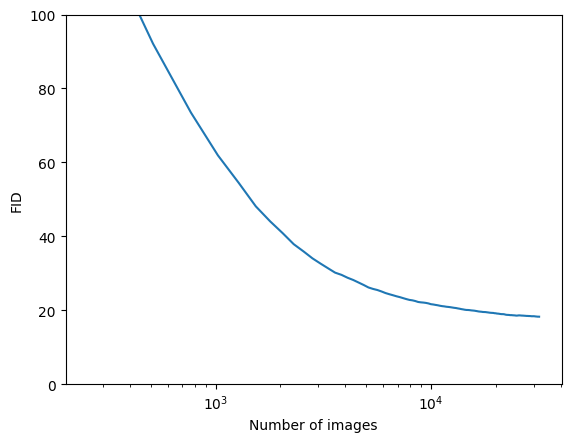

In [14]:
import matplotlib.pyplot as plt

plt.plot(n_imgs_total, fid_scores)
plt.ylim(0, 100)
plt.xscale("log")

plt.xlabel("Number of images")
plt.ylabel("FID")
